In [122]:
import pandas as pd
import pytz, datetime
import pytz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [123]:
#gdas = pd.read_csv('teffDatavAbr2021.csv',delimiter=r",+", skiprows=1, names=['id','date','teff', 'ts', 'ps'],lineterminator='\n')
gdas = pd.read_csv('teffDatavAbrMex2021.csv',delimiter=r",+", skiprows=1, names=['id','date','teff', 'ts', 'ps'],lineterminator='\n')
gdas .drop(columns=['id'])


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,date,teff,ts,ps
0,2021-04-06 00:00:00,259.406577,293.244192,863.162462
1,2021-04-06 03:00:00,258.896263,287.763835,862.107863
2,2021-04-06 06:00:00,258.668698,288.041615,861.541863
3,2021-04-06 09:00:00,258.715166,289.313419,860.780563
4,2021-04-06 12:00:00,258.761387,288.093184,860.345263
...,...,...,...,...
108,2021-04-19 12:00:00,259.978991,289.244335,864.975222
109,2021-04-19 15:00:00,260.781739,304.089267,863.450563
110,2021-04-19 18:00:00,261.907803,311.551817,864.177743
111,2021-04-19 21:00:00,262.115969,306.504178,858.584863


In [124]:
gdas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      113 non-null    int64  
 1   date    113 non-null    object 
 2   teff    113 non-null    float64
 3   ts      113 non-null    float64
 4   ps      113 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.5+ KB


In [125]:
gdas['date']=pd.to_datetime(gdas.date, format='%Y-%m-%d %H:%M:%S',utc=True)

gdas.set_index(['date'],drop=True, inplace=True)


In [126]:
path='datos2021/'
#datos= pd.read_csv(path+"DAT03Marzo2021_1237_Allday.csv", dtype={'Fecha': 'str','Hora(UTC)': 'str'})
datos= pd.read_csv(path+"DAT050420211542_Allday.csv", dtype={'Fecha': 'str','Hora(UTC)': 'str'})

In [127]:
mex=pd.DataFrame(datos)
mex['datetime']=pd.to_datetime(mex['Fecha'] +mex['Hora(UTC)'], format='%d%m%y%H%M%S')
mex['conteo']=mex['Coincidencias'].values/(1.448*0.0625)/3600
#mex['Coincidencias']=mex['Coincidencias'].values
mex.set_index(['datetime'],drop=True, inplace=True)
mex= mex.iloc[1:]
mex=mex.resample('H').sum()
flagPy1=np.logical_and(mex.index>="2021-04-6",mex.index<="2021-04-20")
mex=mex[flagPy1]
sup=np.percentile(mex['conteo'].values, 95)                
inf=np.percentile(mex['conteo'].values, 6)  
flag=np.logical_and(mex['conteo'].values<sup,mex['conteo'].values>inf)
mex=mex[flag]

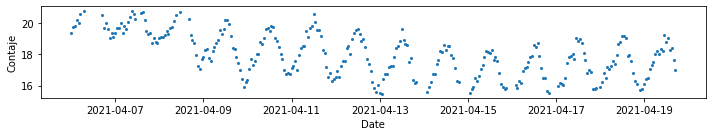

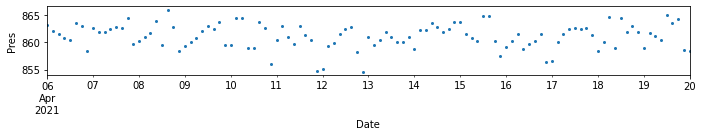

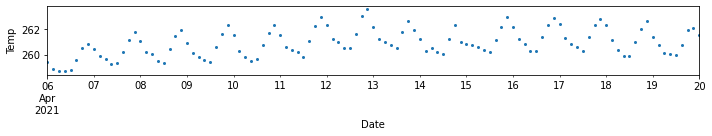

In [128]:
fig, axes = plt.subplots(1,1, figsize=(10,2), sharex=True)
mex['conteo'].plot(subplots=True,marker='.', markersize=4, linestyle='None', ax=axes)
axes.set_ylabel('Contaje')
axes.set_xlabel('Date')
plt.tight_layout()
#plt.savefig('pngs/SerieCrudaContaje.png')

fig, axes = plt.subplots(1,1, figsize=(10,2), sharex=True)
gdas['ps'].plot(subplots=True,marker='.', markersize=4, linestyle='None', ax=axes)
axes.set_ylabel('Pres')
axes.set_xlabel('Date')
plt.tight_layout()

#plt.savefig('pngs/GDASTefSerieCrudaPress.png')
fig, axes = plt.subplots(1,1, figsize=(10,2), sharex=True)
gdas['teff'].plot(subplots=True,marker='.', markersize=4, linestyle='None', ax=axes)
axes.set_ylabel('Temp')
axes.set_xlabel('Date')
plt.tight_layout()
#plt.savefig('pngs/GDASTefSerieCrudaTemp.png')




In [131]:
#flagB=counts.eficiencia>=0.7
countsClean=mex

In [130]:
combined = gdas.join(countsClean['Coincidences'], how='outer')
combined=combined.drop(combined.index[0])
#combined[18000:].head()

KeyError: 'Coincidences'

In [107]:
#remove data
#flag=np.logical_and(combined.index>="2021-3-24",combined.index<="2021-3-25 ")
flag=np.logical_and(combined.index>="2021-04-6",combined.index<="2021-04-19")

In [108]:
#normalize delta
Im=combined['conteo'].dropna().mean()
combined['dIoIm']=(combined['conteo'][flag]-Im)/(Im)*100
P0=combined['ps'][flag].dropna().mean()
combined['dP']=(combined['ps'][flag]-P0)
                

In [109]:
P0

1002.9358110464548

In [110]:
Tg=combined['teff'][flag].dropna().mean()
combined['dTg']=(combined['teff'][flag]-Tg)

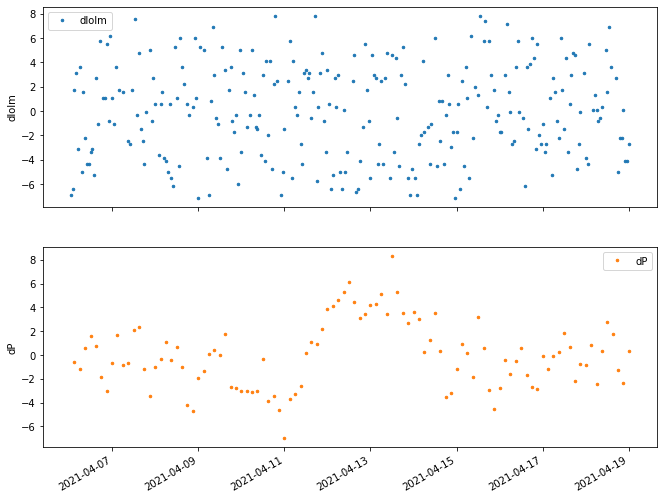

In [111]:
var = ['dIoIm', 'dP']

axes = combined[var][flag].plot(marker='.', markersize=5 , linestyle='None', figsize=(11, 9), subplots=True)
#axes = combined[var].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True)
for ax,v in zip(axes,var):
    ax.set_ylabel(v)
#plt.savefig('pngs/GDASTefSerieDeltaIComOutrliers.png')

In [54]:
combined=combined[flag]

In [55]:
#remove outliers
var='dIoIm'
distance = 1.5 * (np.percentile(combined[var][~np.isnan(combined[var])], 75) - np.percentile(combined[var][~np.isnan(combined[var])], 25))
fA=combined[var]< distance + np.percentile(combined[var][~np.isnan(combined[var])], 75)
fB=combined[var] > np.percentile(combined[var][~np.isnan(combined[var])], 25) - distance
fC=np.isnan(combined[var]) 
combinedNew=combined[np.logical_or(np.logical_and(fA,fB),fC)]


In [56]:
flagNa=~np.isnan(combinedNew['dIoIm'].values)

In [57]:
combinedNew = combinedNew.apply(
    pd.Series.interpolate, 
    args=('index',) 
)

In [58]:
combinedNew=combinedNew[flagNa]

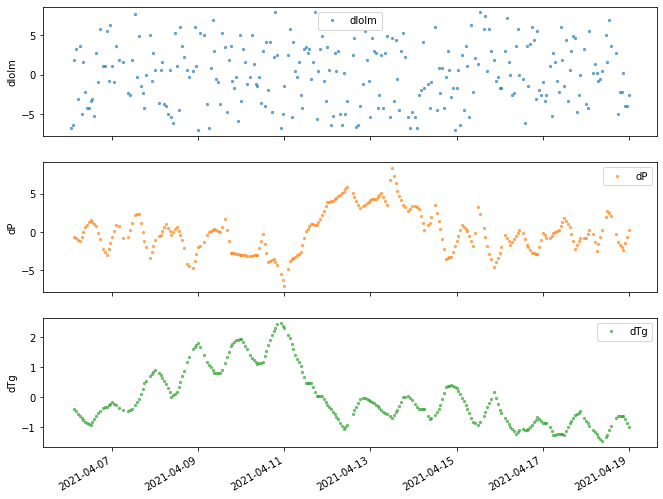

In [59]:
var = ['dIoIm', 'dP','dTg']
axes = combinedNew[var].plot(marker='.',markersize=4.5, linestyle='None', alpha=0.6, figsize=(11, 9), subplots=True)
#axes = combined[var].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True)
for ax,v in zip(axes,var):
    ax.set_ylabel(v)
#plt.savefig('pngs/GDASTefSeries.png')

In [60]:
combinedNewHour=combinedNew.resample('H').mean()

In [61]:
combinedNewHour['dIoIm']

2021-04-06 01:00:00+00:00   -6.825366
2021-04-06 02:00:00+00:00   -6.357151
2021-04-06 03:00:00+00:00    1.836598
2021-04-06 04:00:00+00:00    3.241241
2021-04-06 05:00:00+00:00   -3.079652
                               ...   
2021-04-18 20:00:00+00:00   -2.143223
2021-04-18 21:00:00+00:00    0.197848
2021-04-18 22:00:00+00:00   -4.016080
2021-04-18 23:00:00+00:00   -4.016080
2021-04-19 00:00:00+00:00   -2.611437
Freq: H, Name: dIoIm, Length: 312, dtype: float64

In [62]:
combinedNewHour=combinedNewHour.dropna()

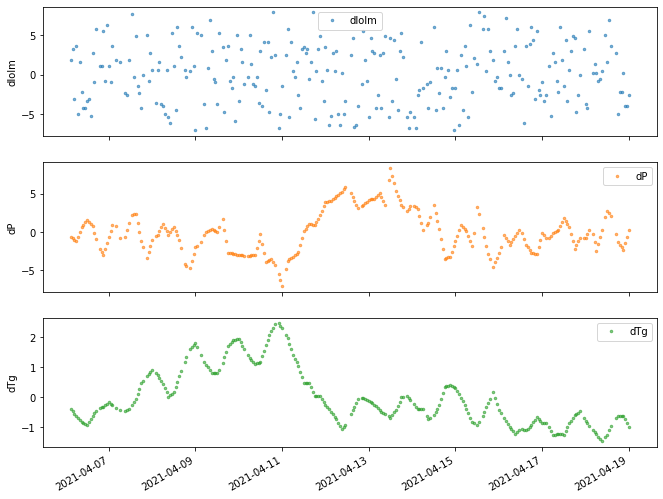

In [63]:
var = ['dIoIm', 'dP','dTg']
axes = combinedNewHour[var].plot(marker='.',markersize=5, linestyle='None', alpha=1.6, figsize=(11, 9), subplots=True)
#axes = combined[var].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True)
for ax,v in zip(axes,var):
    ax.set_ylabel(v)
#plt.savefig('pngs/GDASTefSeriesDeltaIDeltaPDeltaTgPorHOra.png')

In [64]:
lm = LinearRegression() 
X=combinedNewHour['dP'].values.reshape(-1,1)
Y=combinedNewHour['dIoIm']

In [65]:
lm.fit(X,Y)

LinearRegression()

In [66]:
print(lm.intercept_)
print(lm.coef_)

0.1227562821679111
[-0.10197471]


In [67]:
pred=lm.predict(X)
print(np.sum(np.square(np.square(pred - Y))))

111087.20391602673


In [68]:
print("R-squared value of this fit:",round(metrics.r2_score(Y,pred),3))

R-squared value of this fit: 0.005


In [69]:
combinedNewHour['dP'].corr(combinedNewHour['dIoIm'])

-0.07237204992210723

In [70]:
combinedNew['dP'].corr(combinedNew['dIoIm'])

-0.07237204992210723

/home/lmenode1/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='dIoIm'>

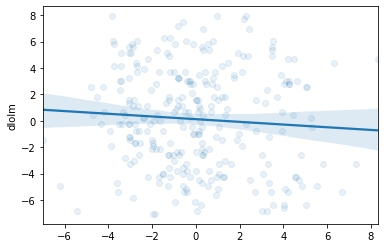

In [71]:
sns.regplot(combinedNewHour['dP'].values.reshape(-1,1),combinedNewHour['dIoIm'],scatter_kws={'alpha':0.1})
#plt.savefig('pngs/GDASTefscatterdPvsDIoIm.png')

In [72]:
lm.coef_

array([-0.10197471])

In [73]:
#combinedNewHour['dIoImPC']=combinedNewHour['dIoIm']-pred
combinedNewHour['dIoImPC']=combinedNewHour['dIoIm']-lm.coef_*combinedNewHour['dP']

/home/lmenode1/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='dIoImPC'>

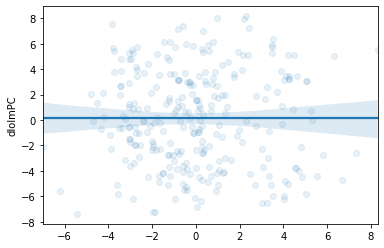

In [74]:
sns.regplot(combinedNewHour['dP'].values.reshape(-1,1),combinedNewHour['dIoImPC'],scatter_kws={'alpha':0.1})
#plt.savefig('pngs/GDASTefscatterdPvsDIoImPC.png')

In [75]:
combinedNewHour['dP'].corr(combinedNewHour['dIoImPC'])

-5.167707324989241e-18

0.12330424635037512
[-0.10326592]
113543.64127517173
[-0.10326592]


/home/lmenode1/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/lmenode1/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='dIoImPTC'>

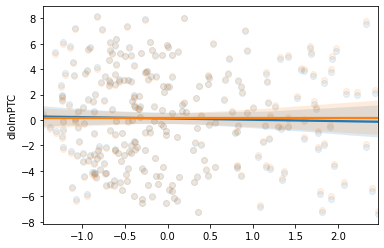

In [76]:
lmT = LinearRegression() 
XT=combinedNewHour['dTg'].values.reshape(-1,1)
YT=combinedNewHour['dIoImPC']
lmT.fit(XT,YT)
print(lmT.intercept_)
print(lmT.coef_)
predT=lmT.predict(X)
print(np.sum(np.square(np.square(predT - YT))))
print(lmT.coef_)
#combinedNewHour['dIoImPC']=combinedNewHour['dIoIm']-pred
combinedNewHour['dIoImPTC']=combinedNewHour['dIoImPC']-lmT.coef_*combinedNewHour['dTg']
sns.regplot(combinedNewHour['dTg'].values.reshape(-1,1),combinedNewHour['dIoImPC'],scatter_kws={'alpha':0.1})
#plt.savefig('pngs/GDASTefscatterdTgvsDIoImPC.png')

sns.regplot(combinedNewHour['dTg'].values.reshape(-1,1),combinedNewHour['dIoImPTC'],scatter_kws={'alpha':0.1})
#plt.savefig('pngs/GDASTefscatterdTgvsDIoImPC.png')


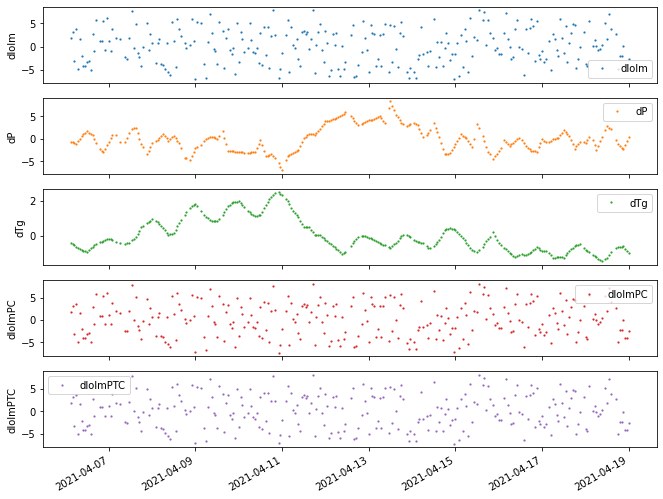

In [77]:
var = ['dIoIm', 'dP','dTg','dIoImPC','dIoImPTC']
axes = combinedNewHour[var].plot(marker='.',markersize=2.5, linestyle='None', alpha=0.9, figsize=(11, 9), subplots=True)
#axes = combined[var].plot(marker='.', alpha=1, linestyle='None', figsize=(11, 9), subplots=True)
for ax,v in zip(axes,var):
    ax.set_ylabel(v)
#plt.savefig('pngs/GDASTefSeriesDIoImvsdPvsDIoImPTC.png') 

In [78]:
combinedNewHour.head()

,id,teff,ts,ps,conteo,dIoIm,dP,dTg,dIoImPC,dIoImPTC
2021-04-06 03:00:00+00:00,1.000000,259.405638,296.267411,1002.310088,84.286644,1.836598,-0.625723,-0.394189,1.772790,1.732084
2021-04-06 04:00:00+00:00,1.333333,259.332283,295.491607,1002.121421,85.449219,3.241241,-0.814390,-0.467545,3.158194,3.109912
2021-04-06 05:00:00+00:00,1.666667,259.258928,294.715803,1001.932755,80.217634,-3.079652,-1.003056,-0.540900,-3.181938,-3.237794
2021-04-06 06:00:00+00:00,2.000000,259.185573,293.939999,1001.744088,85.836744,3.709455,-1.191723,-0.614255,3.587929,3.524498
2021-04-06 07:00:00+00:00,2.333333,259.122312,293.663923,1002.348375,78.667535,-4.952509,-0.587436,-0.677516,-5.012412,-5.082377


In [79]:
combinedNewHour.tail()

,id,teff,ts,ps,conteo,dIoIm,dP,dTg,dIoImPC,dIoImPTC
2021-04-18 20:00:00+00:00,102.666667,259.185243,301.781187,1000.933388,80.992684,-2.143223,-2.002423,-0.614585,-2.347420,-2.410885
2021-04-18 21:00:00+00:00,103.000000,259.192330,299.560511,1000.566088,82.930308,0.197848,-2.369723,-0.607498,-0.043804,-0.106538
2021-04-18 22:00:00+00:00,103.333333,259.064929,297.843265,1001.458388,79.442584,-4.016080,-1.477423,-0.734899,-4.166740,-4.242630
2021-04-18 23:00:00+00:00,103.666667,258.937528,296.126019,1002.350688,79.442584,-4.016080,-0.585123,-0.862300,-4.075748,-4.164794
2021-04-19 00:00:00+00:00,104.000000,258.810127,294.408773,1003.242988,80.605159,-2.611437,0.307177,-0.989701,-2.580113,-2.682315


In [80]:
combinedNewHour['Year'] =combinedNewHour.index.year
combinedNewHour['Month'] = combinedNewHour.index.month
combinedNewHour['day'] = combinedNewHour.index.day
combinedNewHour['hour'] = combinedNewHour.index.hour
combinedNewHour['hour3'] = combinedNewHour.index.hour-3


Text(0, 0.5, 'dIoImPTC')

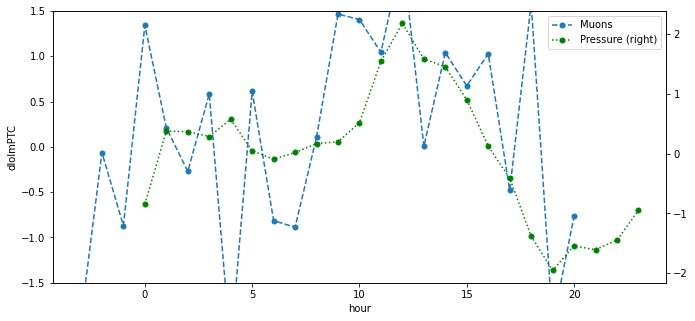

In [81]:
#fig, ax = plt.subplots(figsize=(15,7))
#combinedNew.groupby(['hour']).mean()['count'].plot(ax=ax,marker='.',markersize=5, linestyle='none',legend=True,label='Muons',alpha=1, figsize=(11, 5),ax=ax)
ax = plt.gca()
combinedNewHour.groupby(['hour3']).mean()['dIoImPTC'].plot(marker='.',markersize=10,ylim=(-1.5,1.5), linestyle='dashed',legend=True,label='Muons',alpha=1, figsize=(11, 5),ax=ax)
ax_secondary =combinedNewHour.groupby(['hour']).mean()['dP'].plot(ax=ax,marker='.',markersize=10, label='Pressure', linestyle='dotted',
    legend=True, secondary_y=True, color='g')
ax.set_ylabel('dIoImPTC')
#plt.savefig('GDASTefDayHourdIoImTPChourlyPres.png')